# Predicting Student Performance


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math,copy
%matplotlib inline

## Problem Statement

**Objective**: Develop a Multiple Regression model to predict Student Performance Index based on several key factors.

**Features**: Hours Studied, Previous Scores, Sleep Hours, Number of practice papers practiced.

**Model Development**: Employ Multiple Variable Linear Regression techniques to establish a predictive model. The model will learn the relationship between these input features and the student's performance metric.


## Preparing Data

In [2]:
data = pd.read_csv('Student_Performance.csv')

In [3]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
y = data['Performance Index']
print(type(y))

<class 'pandas.core.series.Series'>


In [5]:
x = data.drop(columns = ['Extracurricular Activities','Performance Index'])

print (type (x))

<class 'pandas.core.frame.DataFrame'>


In [6]:
# converting dataframes into numpy arrays for better calculations
x_final = x.to_numpy()
y_final = y.to_numpy()

In [7]:
print (f'Shape of x is {x_final.shape} and {type(x_final)}')
print (f'Shape of y is {y_final.shape} and {type(y_final)}')

Shape of x is (10000, 4) and <class 'numpy.ndarray'>
Shape of y is (10000,) and <class 'numpy.ndarray'>


In [8]:
# Taking some random parameters to initialize the gradient descent
w = np.array([0,0,0,0])
b = 2

## Dividing Data (train set, cv set, test set)

- Training Set - 60%
- Cross Validation (CV) set - 20%
- Test Set - 20%

Dividing the dataset into training, validation, and test sets is essential for evaluating model performance. The training set trains the model, the validation set tunes hyperparameters to address overfitting and underfitting, and the test set provides an unbiased performance estimate on new data. This approach helps identify and reduce high bias or variance.

In [9]:
np.random.shuffle(x_final)
np.random.shuffle(y_final)

train_ratio = 0.6
cv_ratio = 0.2
test_ratio = 0.2

n = x.shape[0]
n_train = int(n*train_ratio)
n_cv = int(n*cv_ratio)
n_test = n - n_train - n_cv


# dividing traing data
x_train = x_final [:n_train]
x_cv = x_final [n_train:n_cv+n_train]
x_test = x_final [n_cv+n_train:]

# dividing target value data
y_train = y_final [:n_train]
y_cv = y_final [n_train:n_cv+n_train]
y_test = y_final [n_cv+n_train: ]


In [10]:
print (f'length of x_train is {len(x_train)} and length of y_train is {len(y_train)}')
print (f'length of x_cv is {len(x_cv)} and length of y_cv is {len(y_cv)}')
print (f'length of x_test is {len(x_test)} and length of y_test is {len(y_test)}')

length of x_train is 6000 and length of y_train is 6000
length of x_cv is 2000 and length of y_cv is 2000
length of x_test is 2000 and length of y_test is 2000


## Model Prediction (f_wb)

The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`

To demonstrate the dot product, we will implement prediction using (1) and (2).
 


### Vector Multiplication Method

In [11]:
def pred_vector_method(x,w,b):
    """
    x = single training example with multiple features of shape (n,)
    w = model parameter with shape (n,)
    b = scalar
    f_wb = it will be a prediction for the training example given to us (x)
    
    """
    
    f_wb = np.dot(w,x) + b
    
    return f_wb
    


In [12]:
pred_vector_method(x_train[24],w,b)

2

### Using 'for' loop

In [13]:
def pred_loop(x,w,b):
    
    """
    x = single training example with multiple features of shape (n,)
    w = model parameter with shape (n,)
    b = scalar
    f_wb = it will be a prediction for the training example given to us (x)
    
    """
    n = x.shape[0]
    f_wb = 0 
    
    for i in range (n):
        f_wb += w[i]*x[i]
        
    f_wb = f_wb + b 
    
    return f_wb

    

In [14]:
pred_loop (x_train[24],w,b)

2

## Computing the Cost Function

The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

In [15]:
def compute_cost(x,y,w,b):
    
    """
    x = m training examples with n features shape (m,n)
    y = output values of shape (m,)
    w = parameters array of shape (n,)
    b = scalar
    
    """
    n = x.shape[1]
    m = x.shape[0]
    cost = 0
    
    for i in range (m):
        f_wb = pred_vector_method(x[i],w,b)
        cost += (f_wb - y[i])**2
        
    cost = cost/(2*m)
    
    return cost
    

In [16]:
a = compute_cost(x_train,y_train,w,b)
print (f'cost at initial w and b values is{a: .3f}')

cost at initial w and b values is 1609.768


## Computing Gradient

The gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


In [17]:
def compute_gradient(x,y,w,b):
    
    """
    x = m training examples with n features shape (m,n)
    y = output values of shape (m,)
    w = parameters array of shape (n,)
    b = scalar
    
    """  
   
    m = x.shape[0]
    n = x.shape[1]
    
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    
    for i in range (m):
        f_wb = np.dot(x[i],w)+b
        for j in range(n):
            dj_dw[j] += (f_wb-y[i])*x[i,j]
        dj_db = (f_wb - y[i])
        
        
    dj_db = dj_db/m
    dj_dw = dj_dw/m
    
    return dj_dw, dj_db
            
    
    

In [18]:
a = compute_gradient (x_train,y_train,w,b)
a

(array([ -266.67016667, -3720.6555    ,  -349.32483333,  -244.87316667]),
 -0.007)

## Gradient Descent

In [19]:
def gradient_descent (x,y,w,b,alpha,num_iters):
    
    """
    x = m training examples with n features shape (m,n)
    y = output values of shape (m,)
    w = parameters array of shape (n,)
    b = scalar
    alpha = learning rate
    
    """  
    
    J_history = []
    w = copy.deepcopy(w)  #avoid modifying global w within function
    b = b
    
    
    for i in range(num_iters):
        
        dj_dw, dj_db = compute_gradient(x,y,w,b)
        w = w - alpha*(dj_dw)
        b = b - alpha * dj_db 
        
         # Save cost J at each iteration
        if i<100000:     
            J_history.append(compute_cost(x, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history
        


In [48]:
w_final,b_final,cost_hist = gradient_descent(x_train,y_train,w,b,7.0e-5,2000)                
                                             

Iteration    0: Cost   802.92   
Iteration  200: Cost   247.39   
Iteration  400: Cost   240.35   
Iteration  600: Cost   235.04   
Iteration  800: Cost   231.00   
Iteration 1000: Cost   227.92   
Iteration 1200: Cost   225.54   
Iteration 1400: Cost   223.70   
Iteration 1600: Cost   222.25   
Iteration 1800: Cost   221.11   


In [49]:
print(f'Final values are w = {w_final} and b = {b_final:.2f}' )


Final values are w = [1.06081276 0.45210918 1.72562534 0.79973748] and b = 2.00


In [50]:
# We will store all our predictions in one array 
def predictions (x,y,w,b):
    
    
    """
    x = m training examples with n features shape (m,n)
    y = output values of shape (m,)
    w = parameters array of shape (n,)
    b = scalar
    
    """  
    m,n = x.shape
    predictions = np.zeros(m)
    
    for i in range (m):
        predictions[i] = (np.dot(x[i],w) +b)
    
    return predictions
    

In [51]:
predictions = predictions(x_train,y_train,w_final,b_final)

Text(0, 0.5, 'Cost')

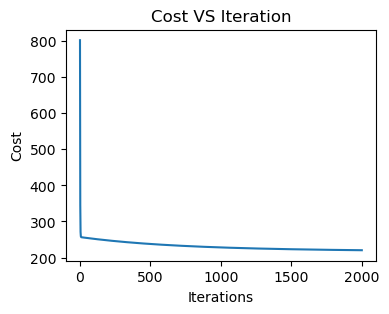

In [52]:
plt.figure(figsize=(4,3))
plt.plot(cost_hist)
plt.title('Cost VS Iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost')

In [53]:
m = len(predictions)
for i in range (m):
    if i%1000==0:
        print (f'predicted {predictions[i]:.2f} for target value {y[i]} ')

predicted 64.24 for target value 36.0 
predicted 42.96 for target value 35.0 
predicted 58.72 for target value 54.0 
predicted 45.39 for target value 75.0 
predicted 40.81 for target value 47.0 
predicted 67.97 for target value 92.0 


In [54]:
y_baseline = np.mean(y_train)

# baseline mean squared error(MSE) is calculated which serves as benchmark
baseline_mse = np.mean((y_train-y_baseline)**2)
print (f'Benchmark is {baseline_mse: .2f}')
print (f'training_set cost = {compute_cost(x_train,y_train,w_final,b_final):.2f}')
print (f'cv_set cost = {compute_cost (x_cv,y_cv,w_final,b_final):.2f}')
print (f'test_set cost = {compute_cost(x_test,y_test,w_final,b_final):.2f}')

Benchmark is  368.51
training_set cost = 220.20
cv_set cost = 230.12
test_set cost = 226.96


## Conclusion

In conclusion, the model demonstrates promising performance with training set cost, cross-validation set cost and test set cost all of which are significantly lower than the benchmark. This indicates that the model generalizes well across different subsets of the data and suggests effective learning and minimal overfitting or underfitting.
